In [16]:
edge = [(0,1,10),(0,2,18),(0,3,6),(0,4,20),(0,5,13),(1,2,10),(1,3,10),(1,4,5),(1,5,7),(2,3,2),(2,4,14),(2,5,15),(3,4,17),(3,5,12),(4,5,10)]

size = 6
WL = {}
for i in range(size):
    WL[i] = []
for (i,j,d) in edge:
    WL[i].append((j,d))

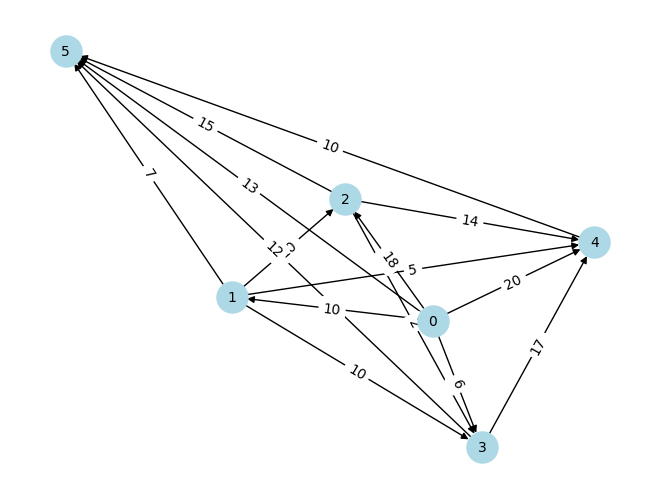

In [18]:

import networkx as nx 
import matplotlib.pyplot as plt 
G = nx.DiGraph()

# Add edges with weights to the graph
for u, v , weight in edge:
    G.add_edge(u, v, weight=weight)

# Draw the graph
pos = nx.spring_layout(G)  # Positions for all nodes
nx.draw(
    G,
    pos,
    with_labels=True,
    node_color="lightblue",
    node_size=500,
    font_size=10,
    arrows=True,
)

# Draw edge labels
edge_labels = {(u, v): f'{d["weight"]:.0f}' for u, v, d in G.edges(data=True)}
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=10)

plt.title("")
plt.show()

In [21]:
class MakeUnionFind:
    def __init__(self) -> None:
        self.components = {}
        self.size = {}
        self.members = {}
    def make_union_find(self , vertices):
        for vertex in range(vertices):
            self.components[vertex] = vertex
            self.members[vertex] = [vertex] 
            self.size[vertex] = 1 
    def find(self, vertex):
        return self.components[vertex]
    
    def union(self , u , v):
        c_old = self.components[u]
        c_new = self.components[v]
        if self.size[c_new] >= self.size[c_old]:
            for x in self.members[c_old]:
                self.components[x] = c_new
                self.members[c_new].append(x)
                self.size[c_new]+=1 
        else:
            for x in self.members[c_new]:
                self.components[x] = c_old
                self.members[c_old].append(x)
                self.size[c_old] +=1
                
def Kruskal(WList):
    edges , TE = [] , [] 
    for u in WList:
        for v, d in WList[u]:
            edges.append((d, u, v))
            
    edges.sort()
    
    mf = MakeUnionFind()
    mf.make_union_find(len(WList.keys()))
    
    for distance , parent , child in edges:
        if mf.components[parent] != mf.components[child]:
            mf.union(parent, child)
            TE.append((parent,child , distance))
        if len(TE) == len(WList.keys())-1:
            break
    return TE 
                
    
                 

In [22]:
edge = [(0,1,10),(0,2,18),(0,3,6),(0,4,20),(0,5,13),(1,2,10),(1,3,10),(1,4,5),(1,5,7),(2,3,2),(2,4,14),(2,5,15),(3,4,17),(3,5,12),(4,5,10)]

size = 6
WL = {}
for i in range(size):
    WL[i] = []
for (i,j,d) in edge:
    WL[i].append((j,d))
print(Kruskal(WL))

[(2, 3, 2), (1, 4, 5), (0, 3, 6), (1, 5, 7), (0, 1, 10)]
